# Read the dataset 

### 7) Project Name : Propensify Machine Learning Project

### Machine Learning Project by: Jaya sekhani

#### Problem Statement :
Accurately predicting customer behavior, particularly identifying when and why they make purchases, is a significant challenge for businesses. Despite considerable investment in data-driven marketing strategies, many companies struggle to achieve effective targeting, often leading to suboptimal outcomes.

Propensity modeling provides a valuable approach to this problem by estimating the likelihood of customers or leads taking specific actions, such as making a purchase or subscribing to a service. This method uses statistical analysis to examine various factors influencing customer behavior, offering businesses actionable insights for better decision-making.

In this capstone project, your objective is to develop a propensity model for an insurance company. The model will assist in optimizing marketing efforts by identifying which customers from a given list are most likely to respond to marketing campaigns.

#### Objective of the Project:
To build a propensity model that identifies potential customers likely to engage with marketing efforts.

#### Dataset:
The insurance company has supplied two datasets:

Train dataset (train.csv): Contains historical data of previous customers and their behavior, which will be used to train the model.
Test dataset (test.csv): A list of prospective customers targeted for marketing. The task is to predict a binary outcome (yes/no) indicating whether each customer should be targeted.
Note: Columns like 'profit' and 'id' are not relevant to the model's training and prediction and should be excluded from the analysis.

#### Process overview

1.Data Collection  
2.Data Cleaning and Preprocessing  
3.Feature Engineering and Selection  
4.Dealing with Imbalanced Data  
5.Model Selection  
6.Model Training and Evaluation   
7.Save the model as pickle file  
8.Load the model and predict for the test dataset  
9.Append the predicted target  
10.Save the final test file

In [6]:
import pandas as pd
import numpy as np

#libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#libraries for preprocessing steps
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#libraries for resampling the data
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

#libraries for machine learning models
from sklearn.ensemble import GradientBoostingClassifier

#libraries for cross validation,train test split,hyperparameter tuning
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#libraries for performance metrics
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,roc_curve,roc_auc_score,RocCurveDisplay, log_loss

#libraries to regulate warnings
import warnings
warnings.filterwarnings("ignore")

In [7]:
train_dataset = pd.read_excel(r"C:\Users\Jaya\Documents\Jaya_Sekhani\Input_files\train.xlsx")

test_dataset = pd.read_excel(r"C:\Users\Jaya\Documents\Jaya_Sekhani\Input_files\test.xlsx")

In [8]:
train_df=train_dataset.copy()
test_df=test_dataset.copy()

# Understand the dataset

In [10]:
# Get first 5 rows of the dataset

# Set the display option to show all columns
pd.set_option('display.max_columns', None)

train_dataset.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,profit,id
0,34.0,admin.,single,university.degree,no,no,yes,cellular,apr,wed,2.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,999.0,0.0,no,NaN,1.0
1,31.0,services,single,high.school,no,no,no,cellular,jul,thu,35.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,999.0,0.0,no,NaN,2.0
2,NaN,admin.,single,high.school,no,no,no,telephone,jun,NaN,1.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,999.0,0.0,no,NaN,3.0
3,52.0,admin.,divorced,university.degree,unknown,yes,no,cellular,jul,tue,2.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0.0,no,NaN,4.0
4,39.0,blue-collar,single,NaN,unknown,yes,no,cellular,jul,tue,6.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,999.0,0.0,no,NaN,5.0


In [11]:
# Number of rows and columns in the dataset

train_dataset.shape

(8240, 24)

In [12]:
# Check for the datatype and basic information

train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8240 entries, 0 to 8239
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         6224 non-null   float64
 1   profession      8238 non-null   object 
 2   marital         8238 non-null   object 
 3   schooling       5832 non-null   object 
 4   default         8238 non-null   object 
 5   housing         8238 non-null   object 
 6   loan            8238 non-null   object 
 7   contact         8238 non-null   object 
 8   month           8238 non-null   object 
 9   day_of_week     7451 non-null   object 
 10  campaign        8238 non-null   float64
 11  pdays           8238 non-null   float64
 12  previous        8238 non-null   float64
 13  poutcome        8238 non-null   object 
 14  emp.var.rate    8238 non-null   float64
 15  cons.price.idx  8238 non-null   float64
 16  cons.conf.idx   8238 non-null   float64
 17  euribor3m       8238 non-null   f

In [13]:
# Check for the features in the dataset

train_dataset.columns

Index(['custAge', 'profession', 'marital', 'schooling', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths', 'pastEmail',
       'responded', 'profit', 'id'],
      dtype='object')

In [14]:
# Generate descriptive statistics for numerical columns in the given dataset

train_dataset.describe()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,profit,id
count,6224.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,930.000000,8238.000000
mean,39.953728,2.531682,960.916606,0.183054,0.056397,93.570977,-40.577907,3.586929,5165.575965,960.687436,0.365501,77.709677,4119.500000
std,10.540516,2.709773,190.695054,0.514209,1.566550,0.578782,4.650101,1.742784,72.727423,191.841012,1.294101,2881.768500,2378.250092
min,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,-87622.112070,1.000000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,999.000000,0.000000,124.000000,2060.250000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,999.000000,0.000000,170.000000,4119.500000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,999.000000,0.000000,213.000000,6178.750000
max,94.000000,40.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,999.000000,25.000000,515.000000,8238.000000


In [15]:
# Combine the summaries into a single report for easy comparison
# Checking for missing values and data types
missing_values_train = train_dataset.isnull().sum()

summary_train_dataset = pd.DataFrame({
    "Data Type": train_dataset.dtypes,
    "Total Values": train_dataset.shape[0],
    "Missing Values": missing_values_train,
    "Unique Values": train_dataset.nunique()
})

summary_train_dataset

,Data Type,Total Values,Missing Values,Unique Values
custAge,float64,8240,2016,72
profession,object,8240,2,12
marital,object,8240,2,4
schooling,object,8240,2408,8
default,object,8240,2,3
housing,object,8240,2,3
loan,object,8240,2,3
contact,object,8240,2,2
month,object,8240,2,10
day_of_week,object,8240,789,5


In [16]:
train_df = train_dataset.copy()
test_df =test_dataset.copy()

In [17]:
#Ignoring the additional columns available other than the columns mentioned in the project decription.
#Dropping the 'profit' and 'id' features.
def train_exclude_features(x):
    x.drop(['profit','id'],axis=1,inplace=True)
#Delete the last two rows as it has only null values
    x= x.iloc[:-2]
    return x
def test_exclude_features(y):
    y.drop(['id'],axis=1,inplace=True)
    return y

In [18]:
new_train_df = train_df.copy()
new_test_df =test_df.copy()

Thus the additional features such as 'profit' and 'id' are dropped as mentioned in the project description.

In [20]:
new_train_df = train_exclude_features(new_train_df)
new_test_df = test_exclude_features(new_test_df)

In [21]:
# Shape of the dataset after dropping the additional columns

train_dataset.shape

(8240, 24)

# Exploratory Data Analysis (EDA)

In [23]:
# No.of class and its counts in the dataset

train_dataset.responded.value_counts()

responded
no     7310
yes     928
Name: count, dtype: int64

There is majority number of records for -ve response than the +ve response.

In [25]:
# Relative freq of unique values in the target column

train_dataset.responded.value_counts(normalize=True)

responded
no     0.887351
yes    0.112649
Name: proportion, dtype: float64

The target variable is imbalanced. Approx.88% belong to 'no' category and only 11% belong to 'yes' category.

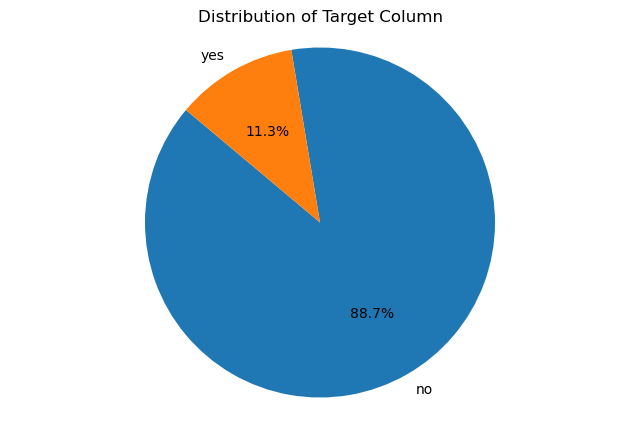

In [27]:
# Plot the target variable % values on pie chart.

responded_counts = train_dataset['responded'].value_counts()

# Plot pie chart
plt.figure(figsize=(8,5))
plt.pie(responded_counts, labels=responded_counts.index,autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target Column')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circ

# Save the plot as PNG file
plt.savefig('1.Distribution_of_Target_Class.png') 
plt.show()

Majority of records belongs to class 'no' than the class 'yes'.

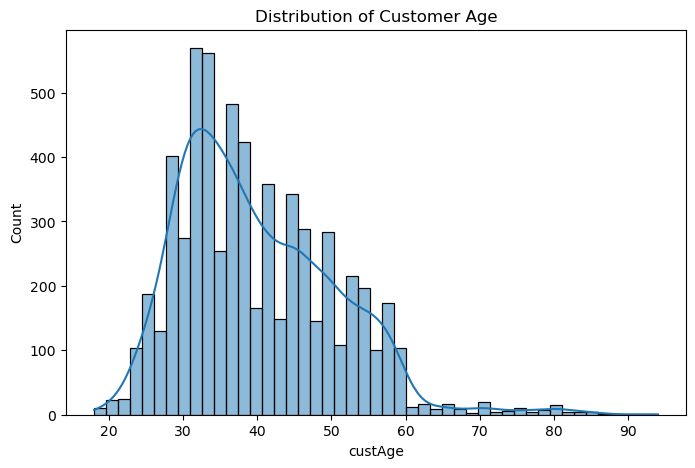

In [29]:
# Plot a histogram with KDE for the 'custAge' column.

plt.figure(figsize=(8,5))
sns.histplot(data = train_dataset,kde=True,x= 'custAge')
plt.title('Distribution of Customer Age')

# Save the plot as PNG file
plt.savefig('2.Distribution of Customer Age.png') 
plt.show()


The 'custAge' feature varies from 18 to 94. It doed not follow the normal distribution.

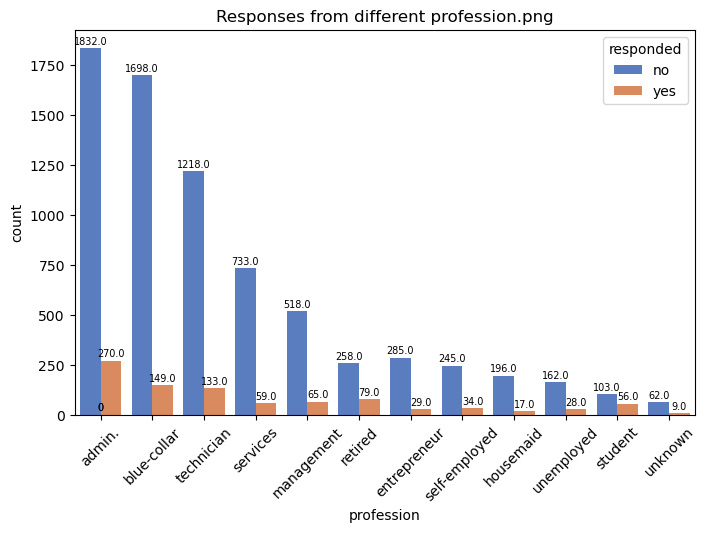

In [31]:
# Plot a countplot for the 'profession' column.

plt.figure(figsize=(8,5))
ax = sns.countplot(data = train_dataset,x= 'profession',hue='responded',palette='muted',order=train_dataset['profession'].value_counts().index)
plt.xticks(rotation=45)

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')

plt.title('Responses from different profession.png')

# Save the plot as PNG file
plt.savefig('3.Response_from_different_profession.png')
plt.show()

The customer with the profession 'admin' has more +ve response than other professions.

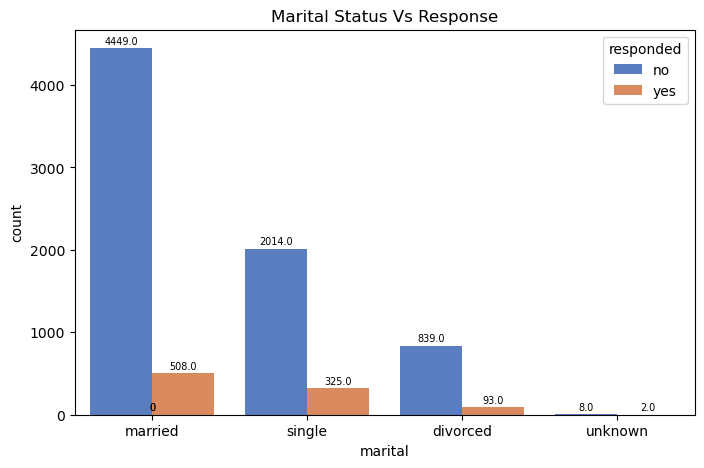

In [33]:
# Plot a countplot for the 'marital' column.

plt.figure(figsize=(8,5))
ax=sns.countplot(data = train_dataset,x= 'marital',hue='responded',palette='muted',order=train_dataset['marital'].value_counts().index)

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')

plt.title('Marital Status Vs Response')

# Save the plot as PNG file
plt.savefig('4.Marital_status_plot.png')
plt.show()

The 'married' customers have given more positive response than single or divorced.

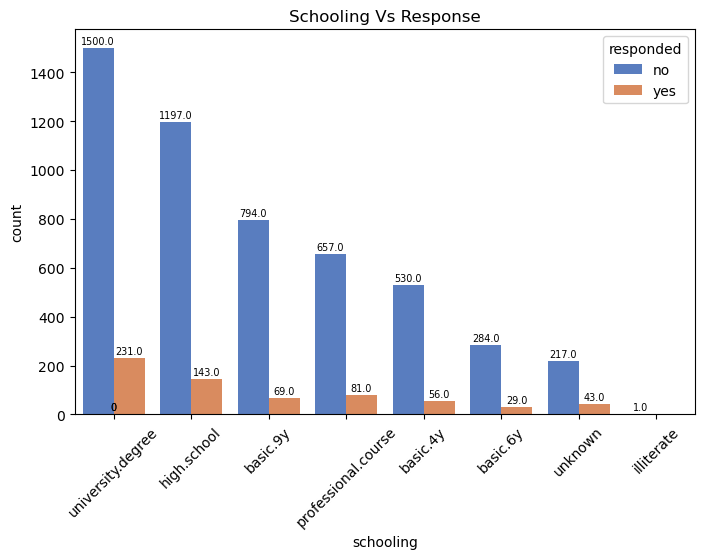

In [35]:
# Plot a countplot for the 'schooling' column.

plt.figure(figsize=(8,5))
ax = sns.countplot(data = train_dataset,x= 'schooling',hue='responded',palette='muted',order=train_dataset['schooling'].value_counts().index)
plt.xticks(rotation=45)

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')

plt.title('Schooling Vs Response')

# Save the plot as PNG file
plt.savefig('5.Schooling_plot.png')
plt.show()

The 'university.degree' education level has more number of positive response than other levels.

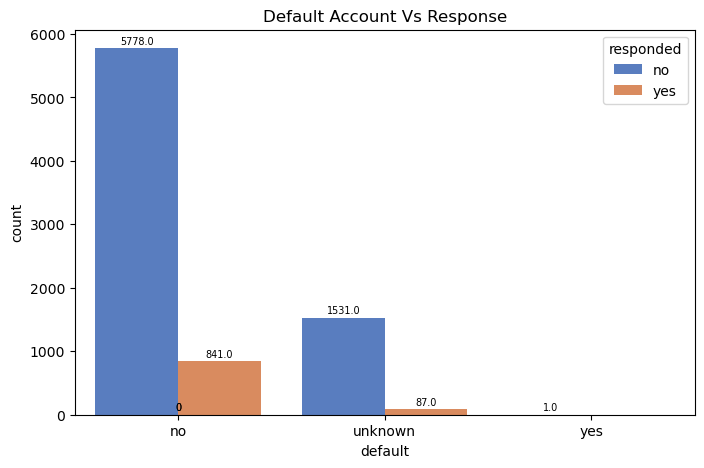

In [37]:
# Plot a countplot for the 'default' column.

plt.figure(figsize=(8,5))
ax=sns.countplot(data = train_dataset,x= 'default',hue='responded',palette='muted',order=train_dataset['default'].value_counts().index)


# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')

plt.title('Default Account Vs Response')

# Save the plot as PNG file
plt.savefig('6.default_account_plot.png')
plt.show()

More number of positive response from the customers who doesn't have defaulted account

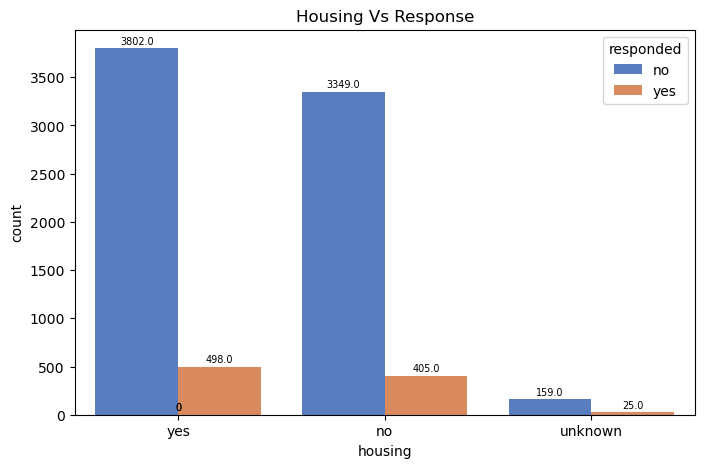

In [39]:
# Plot a countplot for the 'housing' column.

plt.figure(figsize=(8,5))
ax=sns.countplot(data = train_dataset,x= 'housing',hue='responded',palette='muted',order=train_dataset['housing'].value_counts().index)

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')

plt.title('Housing Vs Response')

# Save the plot as PNG file
plt.savefig('7.Housing_plot.png')
plt.show()

The parameter of owning house loan has no significant impact on the responses.

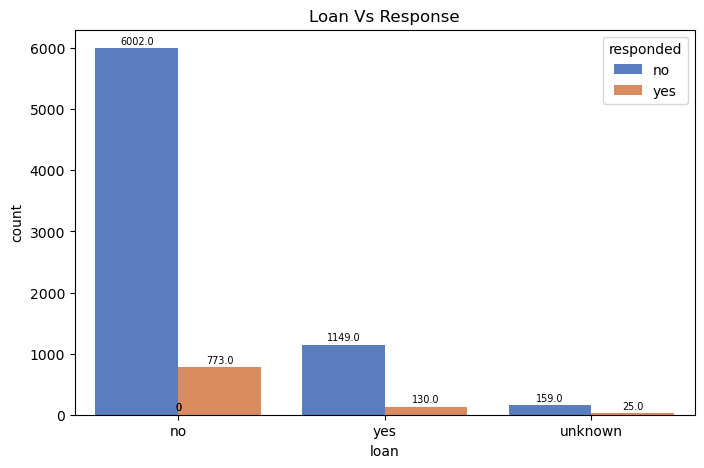

In [41]:
# Plot a countplot for the 'loan' column.

plt.figure(figsize=(8,5))
ax=sns.countplot(data = train_dataset,x= 'loan',hue='responded',palette='muted',order=train_dataset['loan'].value_counts().index)

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')
plt.title('Loan Vs Response')

# Save the plot as PNG file
plt.savefig('8.Loan_plot.png')
plt.show()

There is no significant inference that can be derived from the above graph between owning the personal loan and their responses.
However there is more number of positive reponses from the customers who doesn't have personal loan.

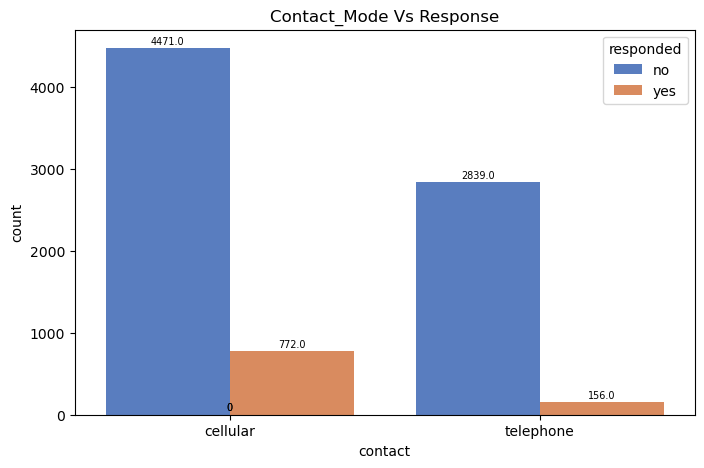

In [43]:
# Plot a countplot for the 'contact' column.

plt.figure(figsize=(8,5))
ax = sns.countplot(data = train_dataset,x= 'contact',hue='responded',palette='muted',order=train_dataset['contact'].value_counts().index)

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')

plt.title('Contact_Mode Vs Response')

# Save the plot as PNG file
plt.savefig('9.Contact_Mode.png')
plt.show()

The cellular communication seems to be more effective than the telephone.

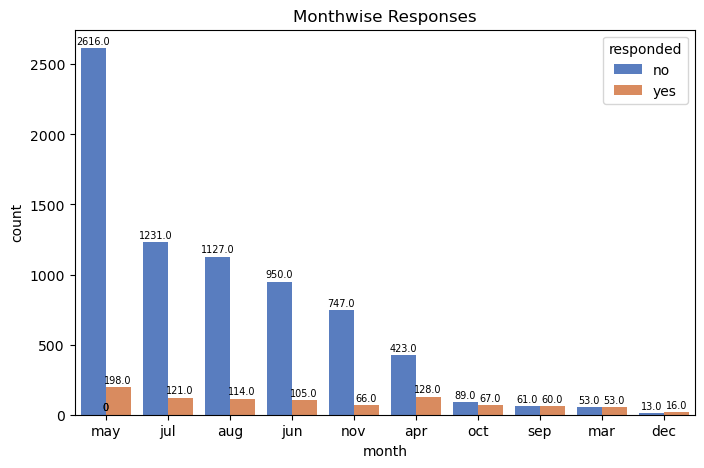

In [45]:
# Plot a countplot for the 'month' column.

plt.figure(figsize=(8,5))
ax = sns.countplot(data = train_dataset,x= 'month',hue='responded',palette='muted',order=train_dataset['month'].value_counts().index)

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')

plt.title('Monthwise Responses')

# Save the plot as PNG file
plt.savefig('10.Month_plot.png')
plt.show()

The positive responses from the customers remains almost equal in all months. However there are no records for January and February months May month has more number of positive responses.

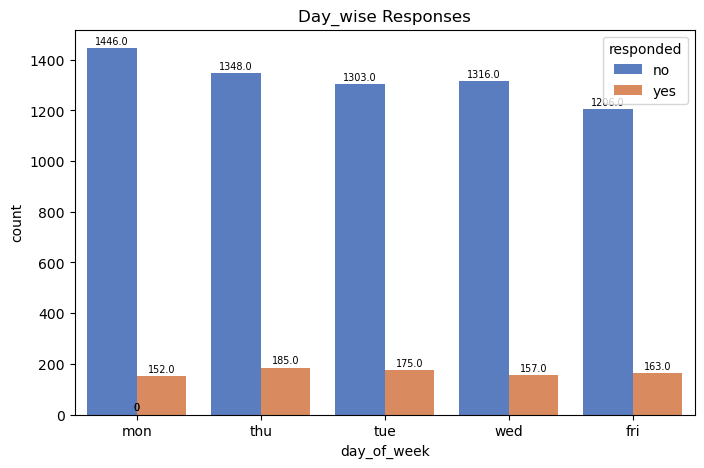

In [47]:
# Plot a countplot for the 'day_of_week' column.

plt.figure(figsize=(8,5))
ax = sns.countplot(data = train_dataset,x= 'day_of_week',hue='responded',palette='muted',order=train_dataset['day_of_week'].value_counts().index)

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')

plt.title('Day_wise Responses')

# Save the plot as PNG file
plt.savefig('11.day_of_week_plot.png')
plt.show()

The +ve responses from the customers remains almost equal in all days of the week.

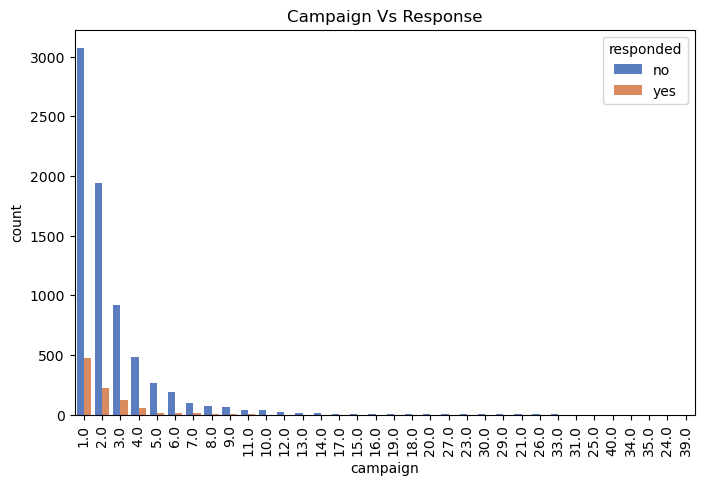

In [49]:
# Plot a countplot for the 'campaign' column.

plt.figure(figsize=(8,5))
sns.countplot(data = train_dataset,x= 'campaign',hue='responded',palette='muted',order=train_dataset['campaign'].value_counts().index)

plt.title('Campaign Vs Response')
plt.xticks(rotation=90)

# Save the plot as PNG file
plt.savefig('12.Campaign_plot.png')
plt.show()

As the number of times the customer contacted increases,the positive responses from the customer decreases.

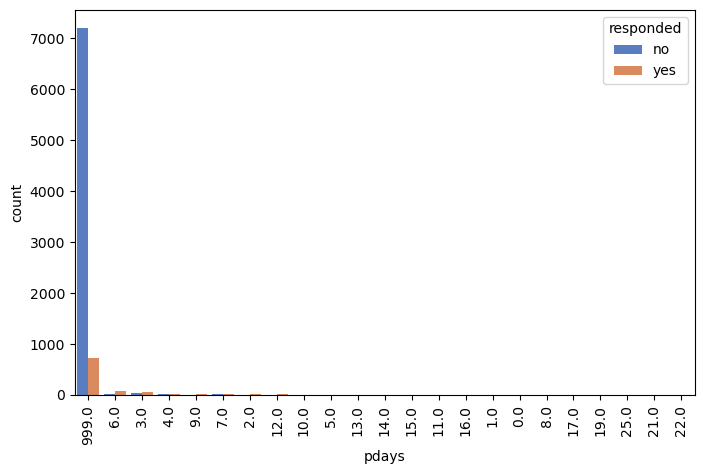

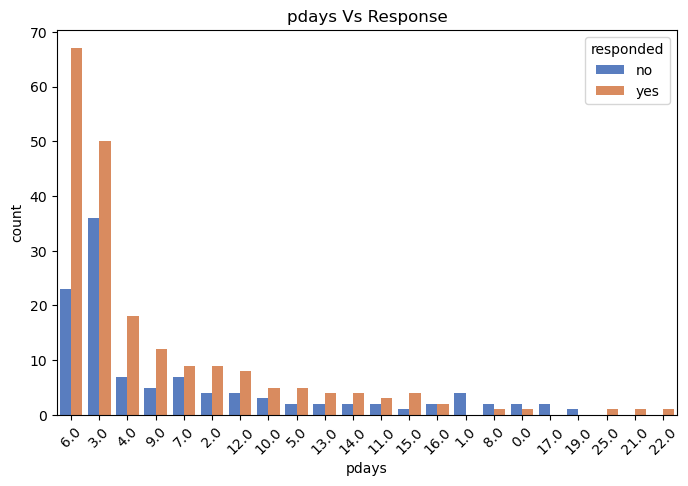

In [51]:
# Plot a countplot for the 'pdays' column.

plt.figure(figsize=(8,5))
sns.countplot(data = train_dataset,x= 'pdays',hue='responded',palette='muted',order=train_dataset['pdays'].value_counts().index)
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(8,5))
temp_df = train_dataset[train_dataset['pdays']!=999]
sns.countplot(x='pdays',hue = 'responded',data = temp_df,palette='muted',order=temp_df['pdays'].value_counts().index)
plt.xticks(rotation = 45)

plt.title('pdays Vs Response')

# Save the plot as PNG file
plt.savefig('13.pdays_plot.png')
plt.show()

After ignoring the customers who were not previously contacted,there are more number of 'yes' responses when the customer is contacted around 6 days after the previous campaign.

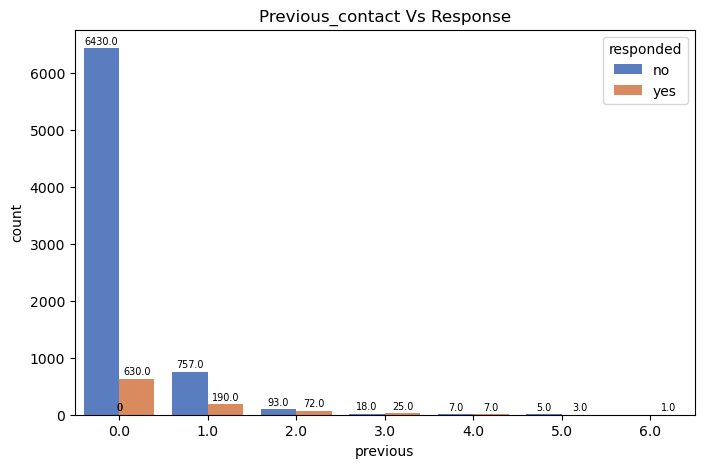

In [53]:
# Plot a countplot for the 'previous' column.

plt.figure(figsize=(8,5))
ax = sns.countplot(data = train_dataset,x= 'previous',hue='responded',palette='muted')

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')


plt.title('Previous_contact Vs Response')

# Save the plot as PNG file
plt.savefig('14.previous_plot.png')
plt.show()

There is no significant relation obtained from the graph between the customer responses and number of previous contacts performed before this campaign.

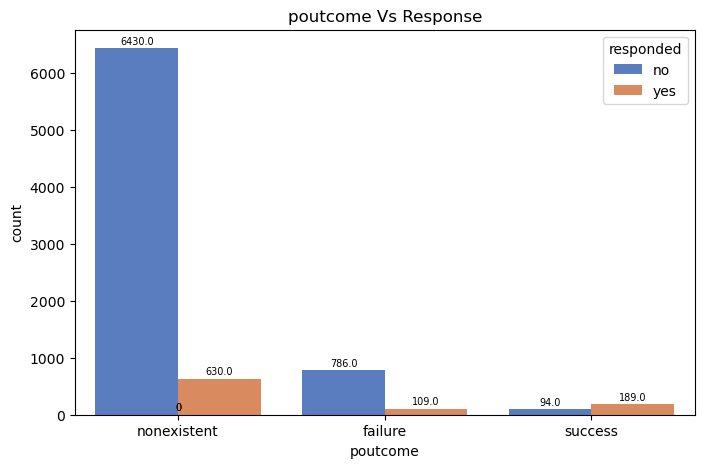

In [55]:
# Plot a countplot for the 'poutcome' column.

plt.figure(figsize=(8,5))
ax=sns.countplot(data = train_dataset,x= 'poutcome',hue='responded',palette='muted')


# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')

plt.title('poutcome Vs Response')

# Save the plot as PNG file
plt.savefig('15.poutcome_plot.png')
plt.show()

There is more number of positive responses than negative responses from the customer when the outcome of the previous marketing marketing campaign is 'Success'

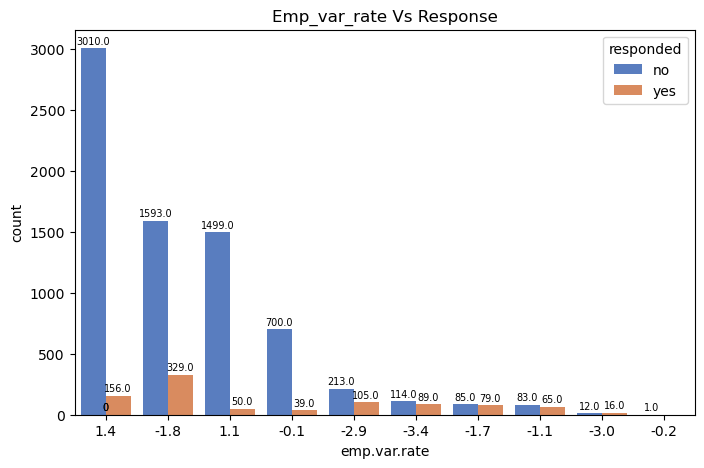

In [57]:
# Plot a countplot for the 'emp.var.rate' column.

plt.figure(figsize=(8,5))
ax=sns.countplot(data = train_dataset,x= 'emp.var.rate',hue='responded',palette='muted',order=train_dataset['emp.var.rate'].value_counts().index)

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5),fontsize=7, textcoords='offset points')

plt.title('Emp_var_rate Vs Response')

# Save the plot as PNG file
plt.savefig('16.emp_var_rate_plot.png')
plt.show()

When the employment variation rate is around -3, there are more positive responses than the negative response from the customers.

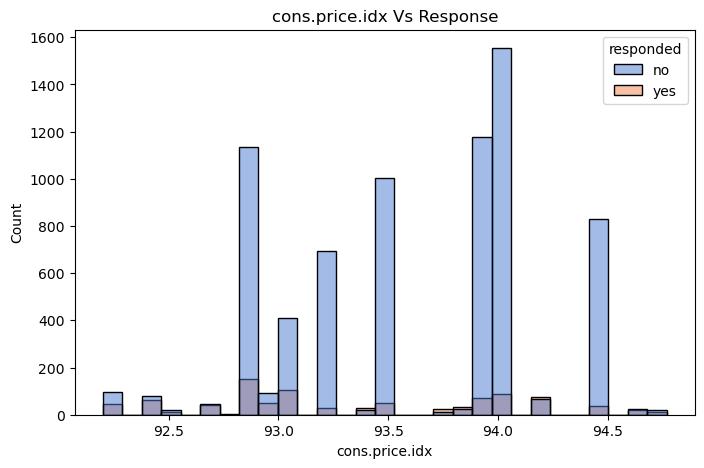

In [59]:
# Plot a countplot for the 'cons.price.idx' column.

plt.figure(figsize=(8,5))
sns.histplot(data = train_dataset,x= 'cons.price.idx',hue='responded',palette='muted')
plt.title('cons.price.idx Vs Response')

# Save the plot as PNG file
plt.savefig('17.cons_price_idx.png')
plt.show()

There is no significant inference obatined from the graph between the customer responses and consumer price index.

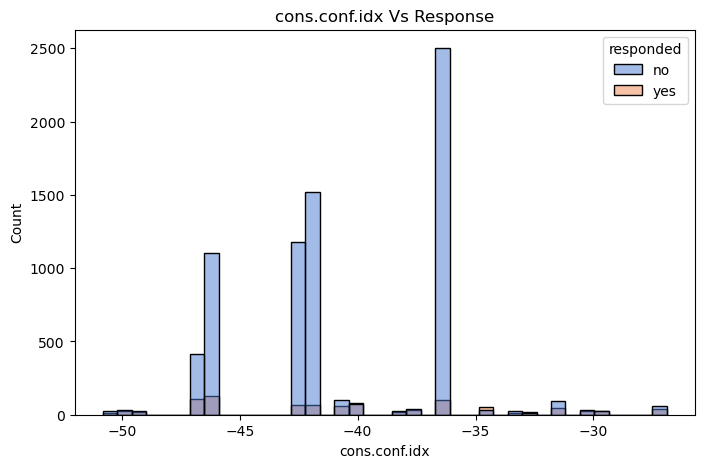

In [61]:
# Plot a countplot for the 'cons.conf.idx' column.

plt.figure(figsize=(8,5))
sns.histplot(data = train_dataset,x= 'cons.conf.idx',hue='responded',palette='muted')
plt.title('cons.conf.idx Vs Response')

# Save the plot as PNG file
plt.savefig('18.cons_conf_idx.png')
plt.show()

There is no significant inference obatined from the graph between the customer responses and consumer confidence index.

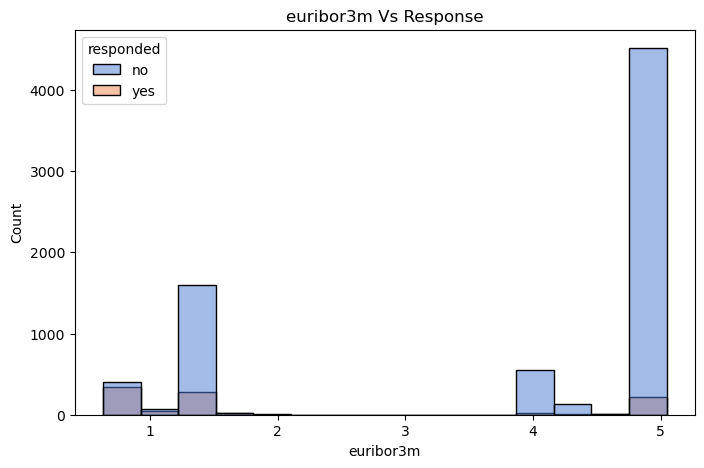

In [63]:
# Plot a histplot for the 'euribor3m' column.

plt.figure(figsize=(8,5))
sns.histplot(data = train_dataset,x= 'euribor3m',hue='responded',palette='muted')
plt.title('euribor3m Vs Response')

# Save the plot as PNG file
plt.savefig('19.euribor3m.png')
plt.show()

There is no significant inference obatined from the graph between the customer responses and euribor 3 month rate.

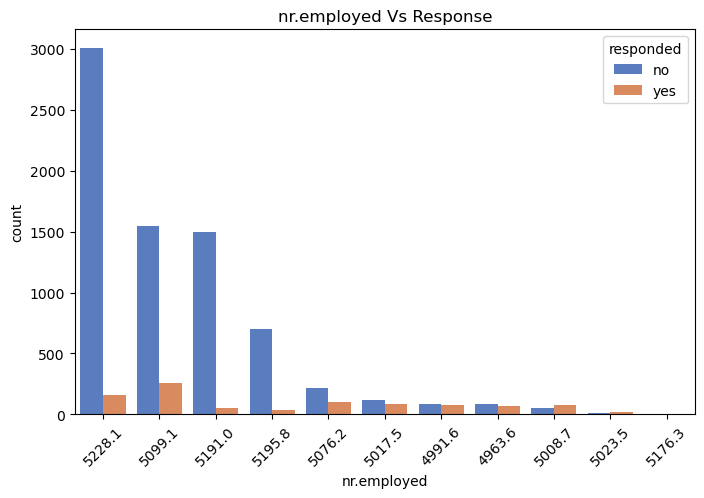

In [65]:
# Plot a countplot for the 'nr.employed' column.

plt.figure(figsize=(8,5))
sns.countplot(data = train_dataset,x= 'nr.employed',hue='responded',palette='muted',order=train_dataset['nr.employed'].value_counts().index)
plt.xticks(rotation=45)
plt.title('nr.employed Vs Response')

# Save the plot as PNG file
plt.savefig('20.nr_employed.png')
plt.show()

There is no significant inference obatined from the graph between the customer responses and number of employees.

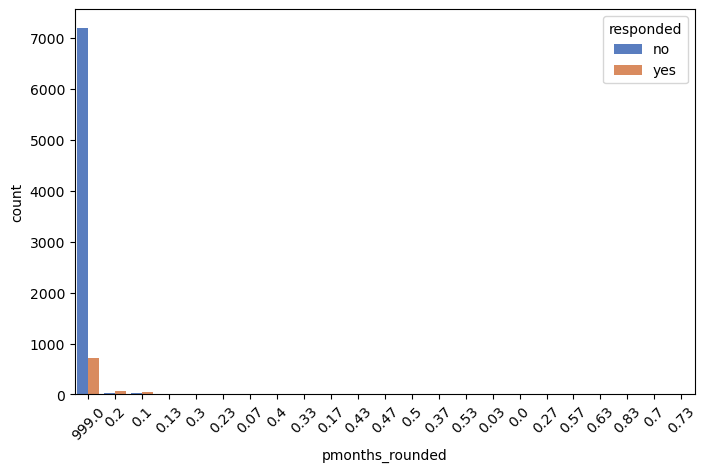

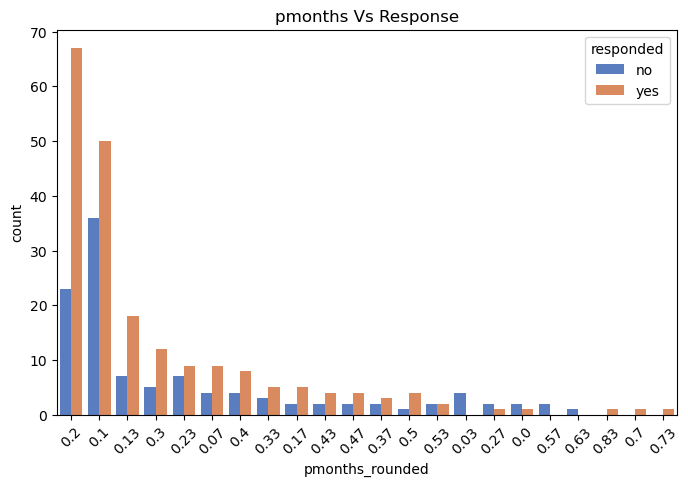

In [67]:
# Plot a countplot for the 'pmonths' column.

plt.figure(figsize=(8,5))
temp_df = train_dataset.copy()
# Round the values in the 'pmonths' column to 2 decimals
temp_df['pmonths_rounded'] = temp_df['pmonths'].round(2)
sns.countplot(x='pmonths_rounded',hue = 'responded',data = temp_df,palette='muted',order=temp_df['pmonths_rounded'].value_counts().index)
plt.xticks(rotation = 45)
plt.show()

plt.figure(figsize=(8,5))
temp_df = train_dataset[train_dataset['pmonths']!=999]
# Round the values in the 'pmonths' column to 2 decimals
temp_df['pmonths_rounded'] = temp_df['pmonths'].round(2)
sns.countplot(x='pmonths_rounded',hue = 'responded',data = temp_df,palette='muted',order=temp_df['pmonths_rounded'].value_counts().index)
plt.xticks(rotation = 45)
plt.title('pmonths Vs Response')

# Save the plot as PNG file
plt.savefig('21.pmonths.png')
plt.show()

After ignoring the customers who were not previously contacted,there are more number of positive responses when the customer is contacted around .2 months from the previous campaign.

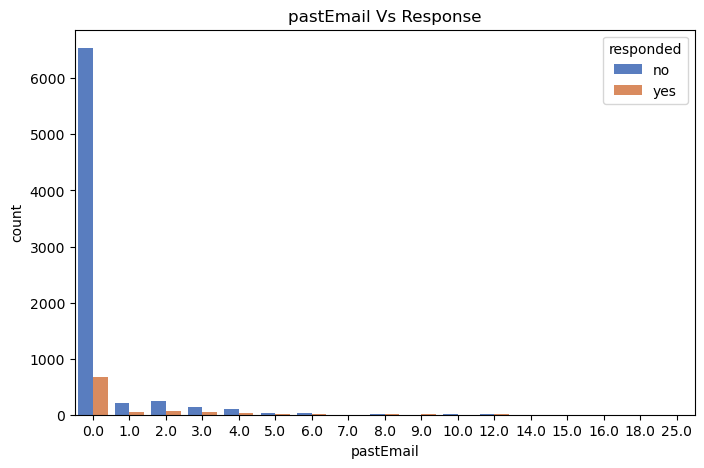

In [69]:
# Plot a countplot for the 'pastEmail' column.

plt.figure(figsize=(8,5))
sns.countplot(data = train_dataset,x= 'pastEmail',hue='responded',palette ='muted')
plt.title('pastEmail Vs Response')

# Save the plot as PNG file
plt.savefig('22.pastEmail.png')
plt.show()

Inspite of the increase in the number of previous email sent to customer,the positive responses from the customer decreases.

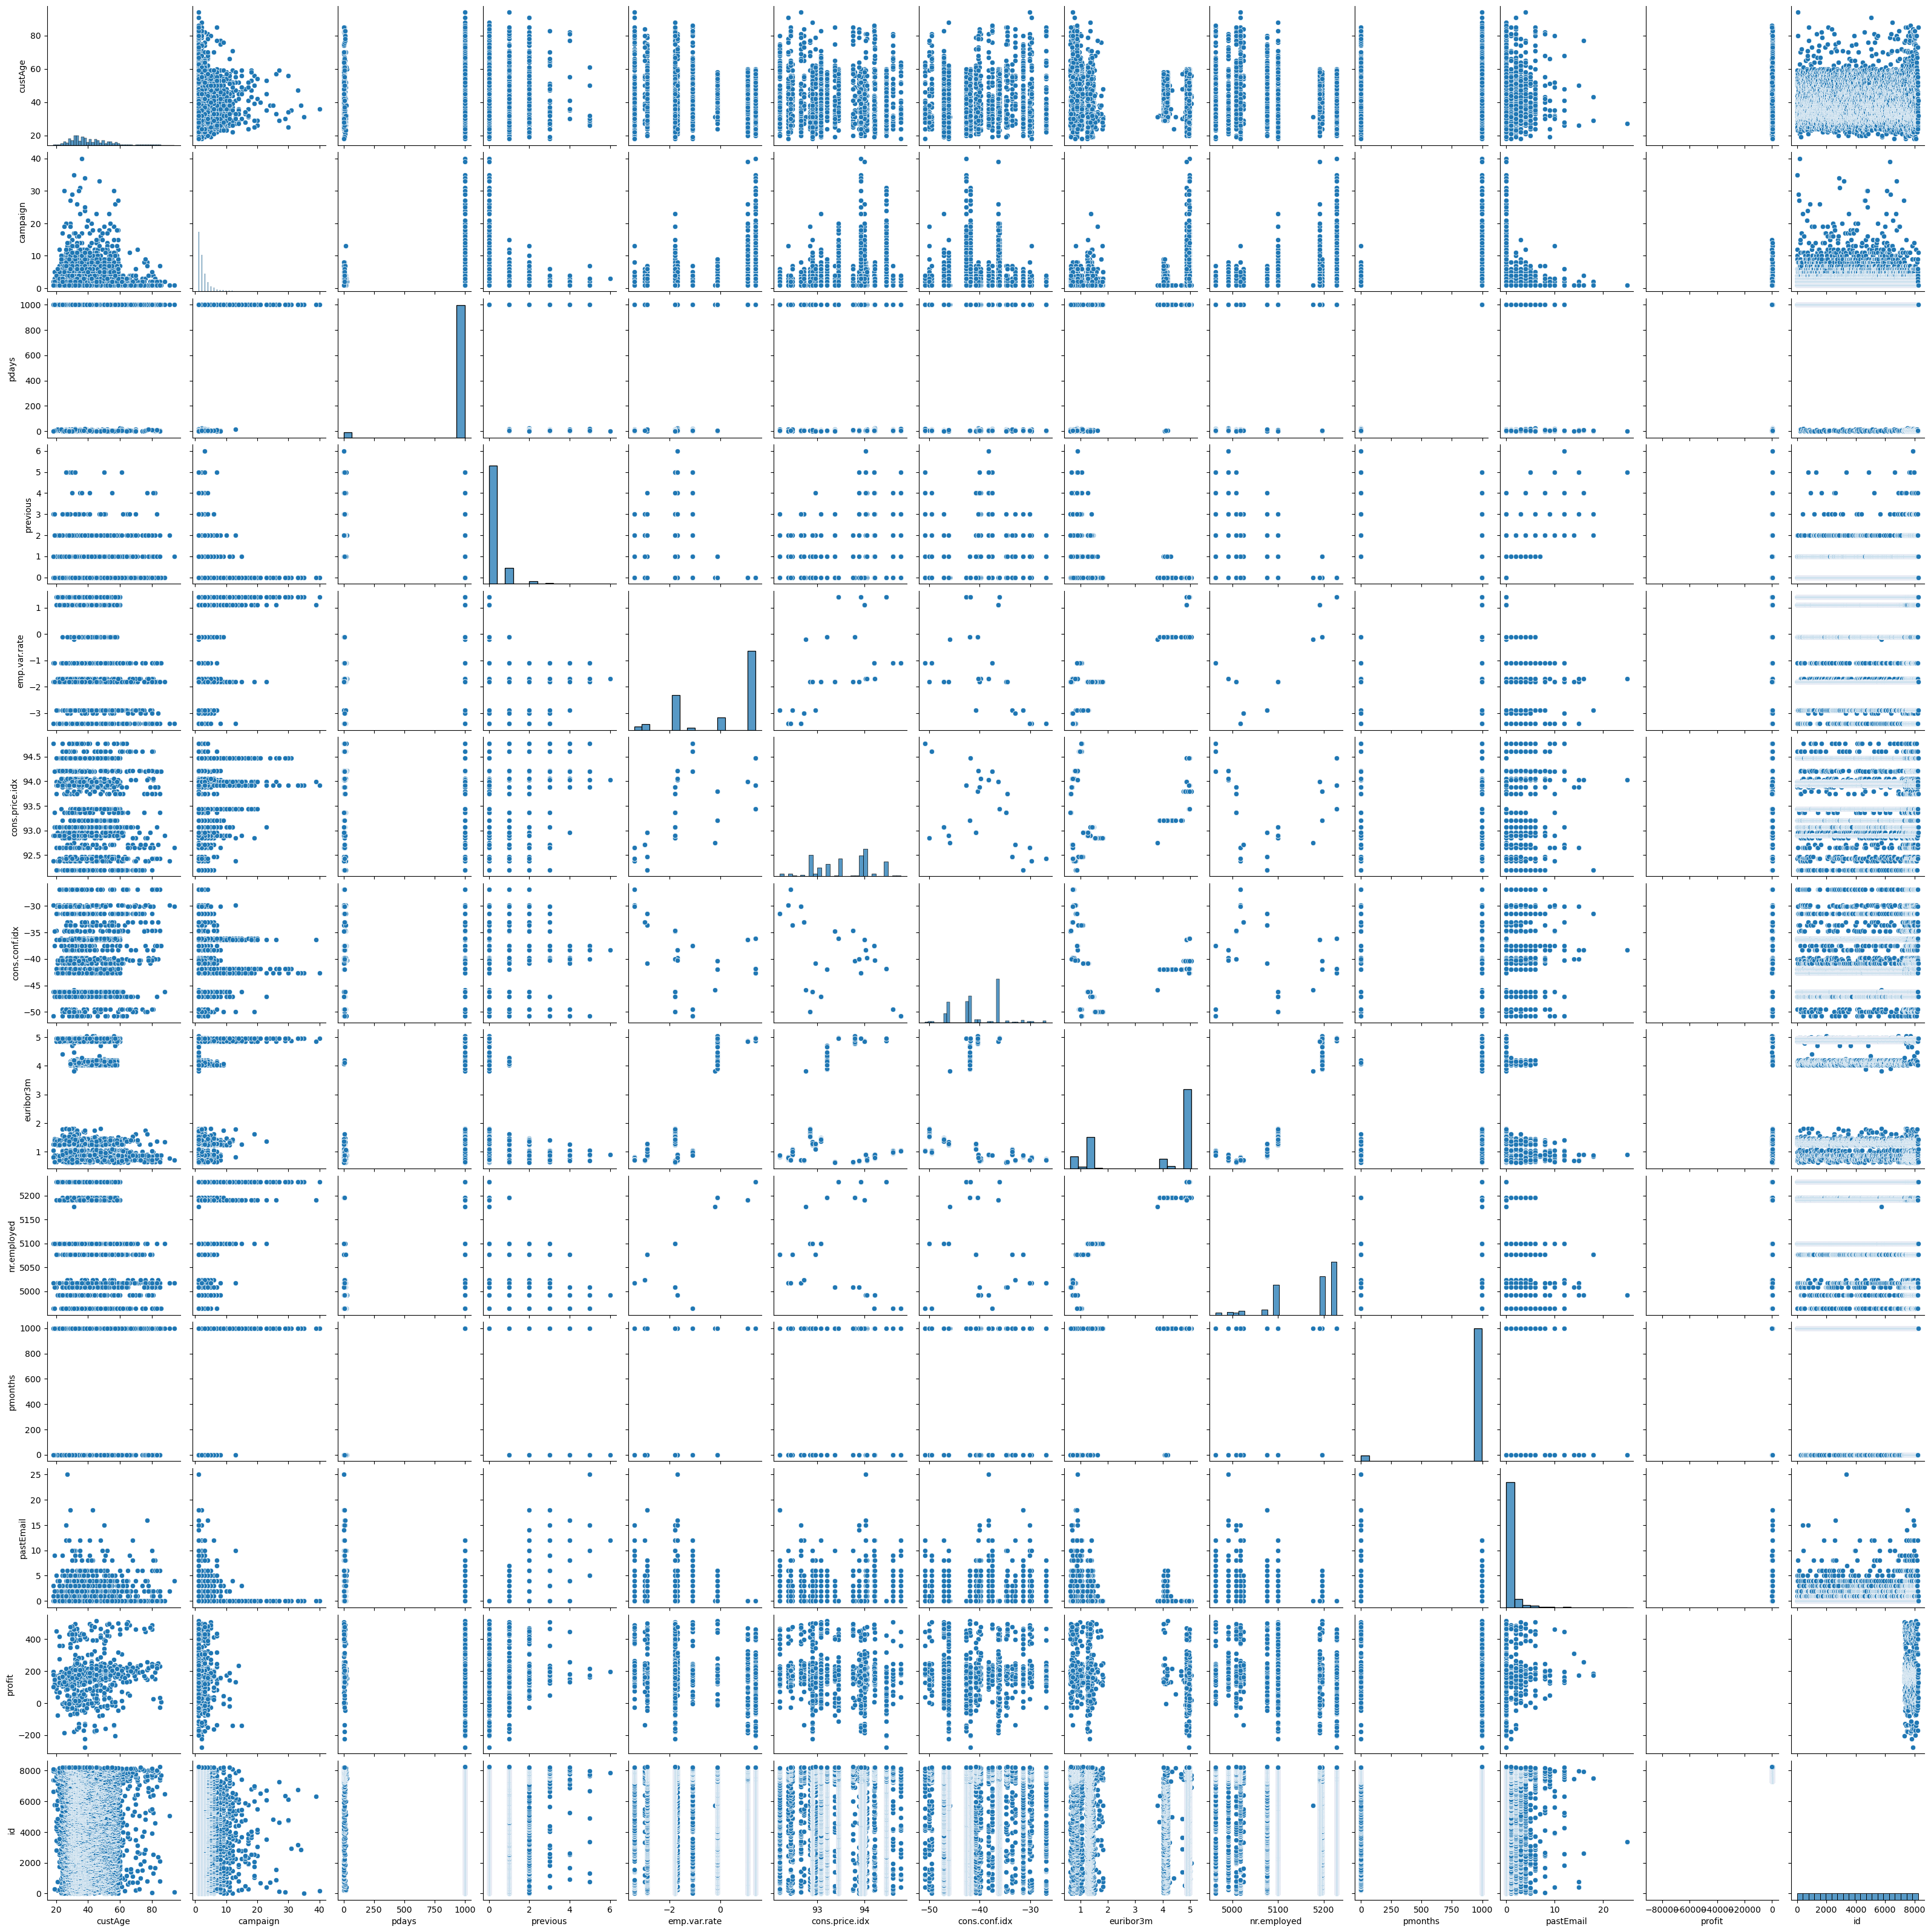

In [71]:
sns.pairplot(train_dataset)

# Save the plot as PNG file
plt.savefig('23.pairplot.png')
plt.show()

There is no significant inference obtained from the above pairplots between the features in the dataset.

In [73]:
# Check for missing values
missing_values = train_dataset.isnull().sum()
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
custAge           2016
profession           2
marital              2
schooling         2408
default              2
housing              2
loan                 2
contact              2
month                2
day_of_week        789
campaign             2
pdays                2
previous             2
poutcome             2
emp.var.rate         2
cons.price.idx       2
cons.conf.idx        2
euribor3m            2
nr.employed          2
pmonths              2
pastEmail            2
responded            2
profit            7310
id                   2
dtype: int64


There are null values in 'custAge','schooling' and 'day_of_week' features.

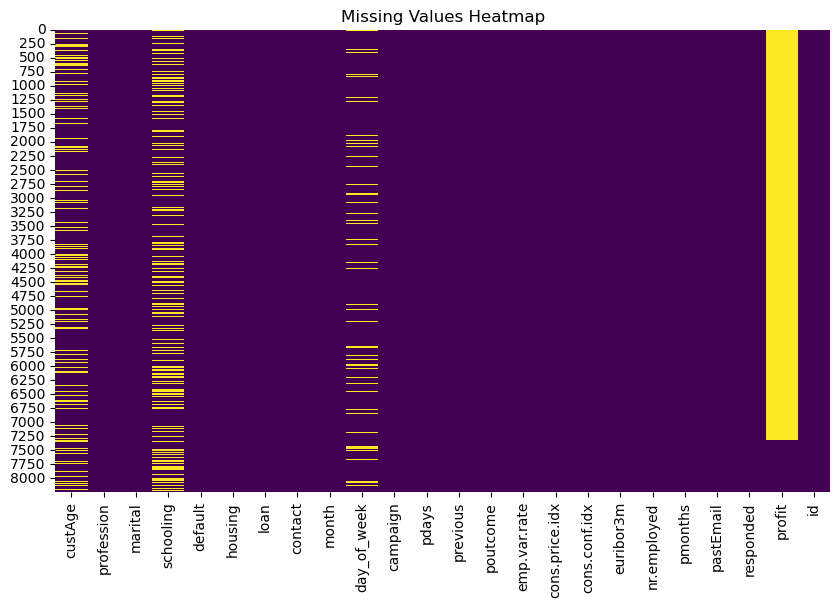

<Figure size 640x480 with 0 Axes>

In [75]:
# Create a heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(train_dataset.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

# Save the plot as PNG file
plt.show()

Only 3 columns have missing values

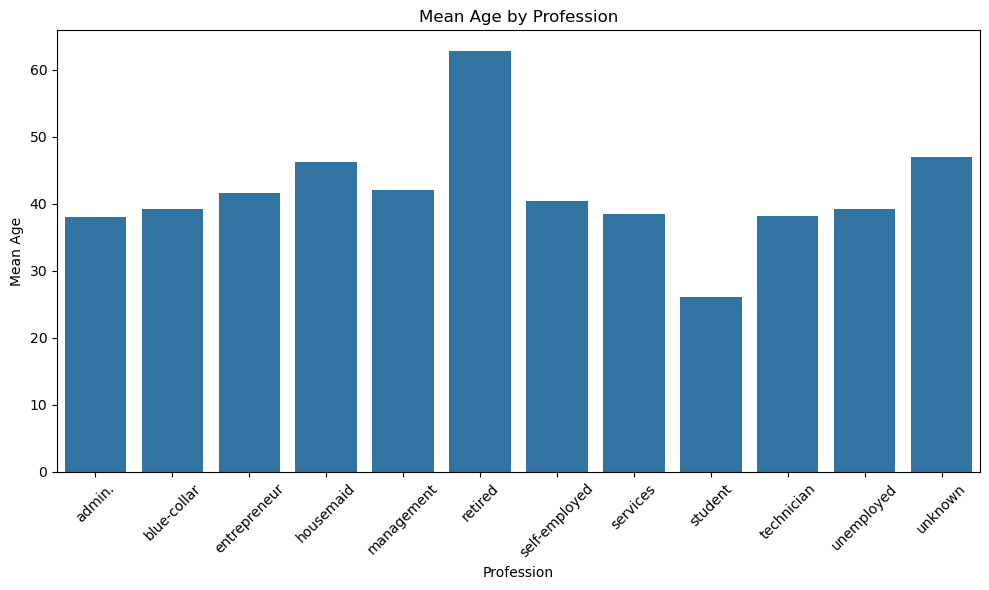

In [77]:
# Impute the missing values in age feature based on the profession done by the customers
# Calculate mean age for each profession

mean_age_by_profession = train_dataset.groupby('profession')['custAge'].mean()

# Plot median age for each profession
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_age_by_profession.index, y=mean_age_by_profession.values)
plt.xlabel('Profession')
plt.ylabel('Mean Age')
plt.title('Mean Age by Profession')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as PNG file
plt.savefig('Mean_Age_by_Profession.png')
plt.show()


### Null value Treatment 

In [79]:
def null_value_treatment(dataset):
# Calculate mean age for each profession
    mean_age_by_profession = dataset.groupby('profession')['custAge'].mean()
# Impute null values in 'custAge' based on mean age for each profession
    for profession,mean_age in mean_age_by_profession.items():
        dataset.loc[(dataset['profession'] == profession) & (dataset['custAge'].isnull()), 'custAge'] = mean_age
#Mode imputation for categorical column 'day_of_week'
    missing_cat_column = ['day_of_week']
    mode_imputer = SimpleImputer(strategy='most_frequent')
    dataset[missing_cat_column] = mode_imputer.fit_transform(dataset[missing_cat_column])
#Impute null values in 'schooling' column with mode value based on 'profession'.
    schooling_by_profession = dataset.groupby('profession')['schooling'].agg(lambda x: x.mode())
    for profession, mode_value in schooling_by_profession.items():
        dataset.loc[(dataset['profession'] == profession) & (dataset['schooling'].isnull()), 'schooling'] = mode_value
    return dataset   

In [80]:
new_train_df = null_value_treatment(new_train_df)
new_test_df = null_value_treatment(new_test_df)

Thus all the null values are successfully imputed.

### Remove Duplicates

In [83]:
def remove_duplicates(dataset):
    #checking for duplicates
    num_duplicates = dataset.duplicated().sum()
    print(num_duplicates)
    #Removing the duplicate records
    dataset.drop_duplicates(inplace=True)
    return dataset

In [84]:
new_train_df = remove_duplicates(new_train_df)

64


In [85]:
# Checking for duplicates

num_duplicates = new_train_df.duplicated().sum()
num_duplicates

0

### Feature engineering

In [87]:
#Encoding the target variable for class 0 and class 1
new_train_df['responded'] = new_train_df['responded'].map(lambda x: 0 if x == 'no' else 1)

In [88]:
def feature_engineering(dataset):
    dataset.drop('pmonths',axis=1,inplace=True)
#Define conditions and choices for pdays
    conditions = [
        (dataset['pdays'] == 999),
        (dataset['pdays'] < 5),
        ((dataset['pdays'] >= 5) & (dataset['pdays'] <= 10)),
        ((dataset['pdays'] > 10) & (dataset['pdays'] != 999)) ]
    choices = ['not_contacted', 'less_than_5_days', '5_to_10 days', 'greater_than_10_days']
    # Create the 'pdays' column based on conditions
    dataset['pdays'] = np.select(conditions, choices, default='unknown')
    
    
# Define conditions and choices for pastEmail
    conditions_pastEmail = [
        (dataset['pastEmail'] == 0),
        (dataset['pastEmail'] < 10),
        (dataset['pastEmail'] >= 10) ]
    choices_pastEmail = ['no_email_sent', 'less_than_10', 'more_than_10']
    # Create the 'pastEmail_category' column based on conditions
    dataset['pastEmail'] = np.select(conditions_pastEmail, choices_pastEmail, default='unknown')
    

# Define conditions and choices for 'custAge'
    conditions_custAge = [
         (dataset['custAge'] <= 30),
         ((dataset['custAge'] > 30) & (dataset['custAge'] <= 45)),
         ((dataset['custAge'] > 45) & (dataset['custAge'] <= 60)),
         ((dataset['custAge'] > 60) & (dataset['custAge'] <= 75)),
         (dataset['custAge'] > 75) ]
    choices_custAge = ['below_30', '30-45', '45-60','60-75','above_75']
    # Create the 'custAge' column based on conditions
    dataset['custAge'] = np.select(conditions_custAge, choices_custAge, default='unknown')
    return dataset

In [89]:
new_train_df = feature_engineering(new_train_df)
new_test_df = feature_engineering(new_test_df)

Feature engineering is done for 'custAge','pdays','pmonths' and 'pastEmail' features

### Identifying numerical,categorical and binary features

In [92]:
#Finding the numerical features in the dataset
numerical_columns = new_train_df._get_numeric_data().columns
#Find the categorical features in the dataset
categorical_columns = new_train_df.drop(numerical_columns,axis=1).columns
#identify the binary columns
binary_cols = []
for i in new_train_df.select_dtypes(include=['int', 'float']).columns:
    unique_values = new_train_df[i].unique()
    if np.in1d(unique_values, [0, 1]).all():
        binary_cols.append(i)
numerical_columns = [i for i in numerical_columns if i not in binary_cols] 

In [93]:
#find the skewness of the numerical features

def skewness(dataset, numerical_columns):
    # Calculate skewness of each column
    skewness = dataset[numerical_columns].skew()
    
    # Find columns with positive skewness
    positive_skew_cols = skewness[skewness > 1].index.tolist()
    print(positive_skew_cols)
    
    # Apply log transformation to columns with positive skewness
    for col in positive_skew_cols:
        dataset[col] = np.log1p(dataset[col])
    
    return dataset
    

In [94]:
train_dataset

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,profit,id
0,34.0,admin.,single,university.degree,no,no,yes,cellular,apr,wed,2.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,999.0,0.0,no,NaN,1.0
1,31.0,services,single,high.school,no,no,no,cellular,jul,thu,35.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,999.0,0.0,no,NaN,2.0
2,NaN,admin.,single,high.school,no,no,no,telephone,jun,NaN,1.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,999.0,0.0,no,NaN,3.0
3,52.0,admin.,divorced,university.degree,unknown,yes,no,cellular,jul,tue,2.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0.0,no,NaN,4.0
4,39.0,blue-collar,single,NaN,unknown,yes,no,cellular,jul,tue,6.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,999.0,0.0,no,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8235,32.0,self-employed,single,university.degree,no,no,no,cellular,apr,thu,1.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.435,5099.1,999.0,0.0,yes,208.000000,8236.0
8236,NaN,housemaid,married,university.degree,no,no,no,cellular,jun,tue,1.0,999.0,0.0,nonexistent,-2.9,92.963,-40.8,1.099,5076.2,999.0,0.0,yes,129.000000,8237.0
8237,85.0,housemaid,married,NaN,unknown,yes,no,cellular,apr,tue,1.0,999.0,1.0,failure,-1.8,93.749,-34.6,0.642,5008.7,999.0,1.0,yes,33.000000,8238.0
8238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172.112069,NaN


In [95]:
test_dataset

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,id
0,NaN,admin.,married,NaN,no,no,yes,cellular,sep,wed,2,999,1,failure,-1.1,94.199,-37.5,0.886,4963.6,999.0,2,1
1,35.0,services,married,high.school,no,no,no,cellular,sep,tue,2,3,1,success,-3.4,92.379,-29.8,0.788,5017.5,0.1,2,2
2,50.0,blue-collar,married,professional.course,unknown,yes,no,cellular,may,thu,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,999.0,2,3
3,30.0,admin.,single,university.degree,no,no,no,cellular,aug,wed,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,999.0,0,4
4,39.0,services,divorced,high.school,no,yes,no,cellular,nov,tue,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,999.0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,NaN,technician,married,professional.course,no,yes,no,telephone,may,NaN,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,32946
32946,32.0,blue-collar,married,NaN,no,no,yes,cellular,may,thu,4,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,999.0,0,32947
32947,32.0,services,married,high.school,no,no,no,cellular,may,mon,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,999.0,0,32948
32948,32.0,blue-collar,married,basic.9y,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,999.0,0,32949


In [96]:
new_train_df = skewness(new_train_df,numerical_columns)
new_test_df = skewness(new_test_df,numerical_columns)

['campaign', 'previous']
['campaign', 'previous']


### Feature Encoding and Scaling

In [98]:
def feature_encoding(dataset):
# Initialize LabelEncoder    
    label_encoder = LabelEncoder()
#specify the features that needs to be label encoded
    cat_cols1 = ['profession','schooling', 'month', 'day_of_week']
    for col in cat_cols1:
        dataset[col] = label_encoder.fit_transform(dataset[col])
#specify the features that needs to be one hot encoded        
    cat_cols2 = ['custAge','marital', 'default', 'housing', 'loan','contact', 'poutcome','pdays','pastEmail']
# Use pd.get_dummies() to one-hot encode the categorical columns
    encoded_features = pd.get_dummies(dataset[cat_cols2])
# Concatenate the original DataFrame with the encoded features along the columns axis
    dataset = pd.concat([dataset, encoded_features], axis=1)
# Drop the original categorical columns 
    dataset.drop(cat_cols2, axis=1, inplace=True) 

    return dataset

new_train_df = feature_encoding(new_train_df)
new_test_df = feature_encoding(new_test_df)

In [99]:
#Function for scaling the numerical features
def feature_scaling(dataset, numerical_columns):
    sc_x = StandardScaler()
    dataset[numerical_columns] = sc_x.fit_transform(dataset[numerical_columns])
    return dataset

new_train_df = feature_scaling(new_train_df, numerical_columns)
new_test_df = feature_scaling(new_test_df, numerical_columns)

In [100]:
train_dataset=new_train_df.copy()

## Outliers Plot

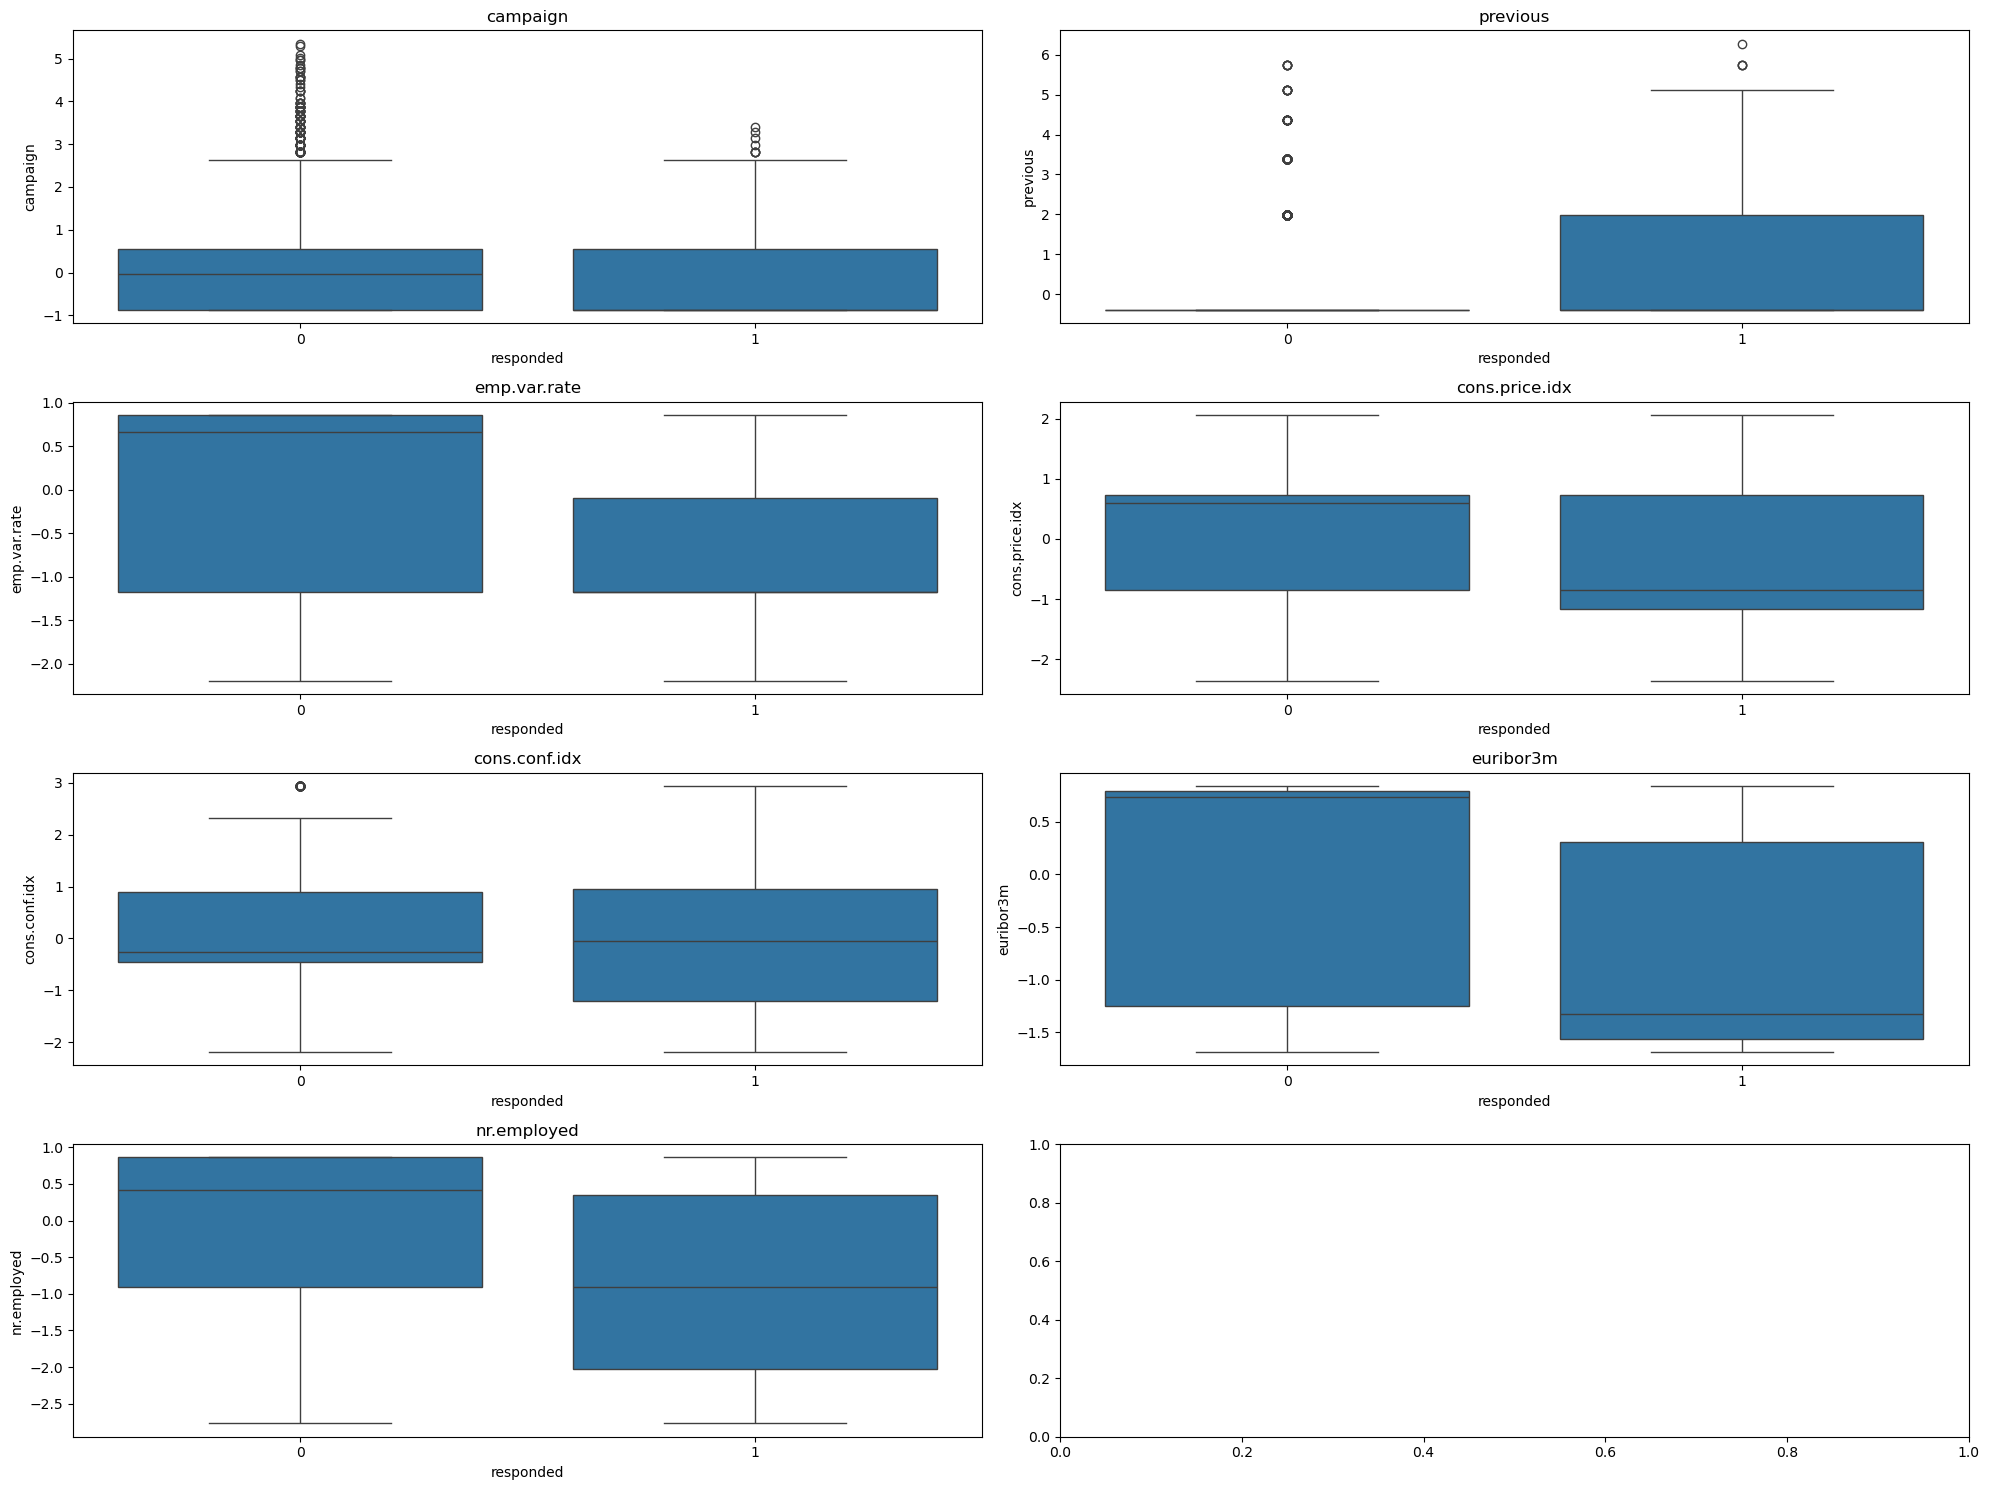

In [125]:
# Boxplot for the numerical features

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
    
# Iterate through each column and create a box plot
# Use two indices to access the correct subplot

for i, col in enumerate(numerical_columns):
    sns.boxplot(data=train_dataset,x = 'responded',y=col, ax=axes[i//2, i%2])  
    axes[i//2, i%2].set_title(col)
plt.tight_layout()

# Save the plot as PNG file
plt.savefig('Outliers.png')
plt.show()

From the above boxplots,we could find outliers present in the features 'campaign'.

### Skewness of the features

In [129]:
# Find the skewness of the numerical features

skewness = train_dataset[numerical_columns].skew()
print(skewness)

campaign          1.355085
previous          2.513850
emp.var.rate     -0.668240
cons.price.idx   -0.184092
cons.conf.idx     0.296747
euribor3m        -0.654088
nr.employed      -1.012087
dtype: float64


### Selection of Models

In [135]:
# Define the classifiers

# Libraries for machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

classifiers ={'Logistic_Regression':LogisticRegression(),
               'K_Neighbors':KNeighborsClassifier(),
              'Support Vector Classifier': SVC(),
              'RandomForest_Classifier':RandomForestClassifier(n_jobs=-1),
              'Gradient_Boosting':GradientBoostingClassifier()
               }

### Splitting data

In [138]:
# Split the dataset into features and target

X_original = train_dataset.drop('responded',axis= 1)
y_original = train_dataset['responded']

In [140]:
from sklearn.model_selection import train_test_split

X_train_original,X_test_original,y_train_original,y_test_original = train_test_split \
                                (X_original,y_original,test_size=0.2,random_state=42,stratify=y_original)

In [142]:
print(X_train_original.shape)
print(X_test_original.shape)
print(y_train_original.shape)
print(y_test_original.shape)

(6539, 41)
(1635, 41)
(6539,)
(1635,)


In [144]:
# Create an empty dataframe to store scores for various algorithms
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,roc_curve,RocCurveDisplay, log_loss
 
score_card = pd.DataFrame(columns=['Model','Accuracy','Recall','Precision','ROC_AUC_score','f1-score'])
score_card1 = pd.DataFrame(columns=['Model','Accuracy','Recall','Precision','ROC_AUC_score','f1-score'])

# Update the result table for all the scores
# Performance measure considered for model comparison are AUC score,Precision,Recall,Accuracy,F1-score.
# Compile the required information in a user defined function
def update_score_card(model,accuracy,recall,precision,AUC_score,f1):
    global score_card
    new_score_card = pd.DataFrame({'Model':model,'Accuracy':[accuracy],
                                  'Recall':[recall],'Precision':[precision],
                                  'ROC_AUC_score':[AUC_score],'f1-score':[f1]})
    # append the results to the dataframe
    score_card = pd.concat([score_card,new_score_card],ignore_index=True)
    
def update_score_card1(model,accuracy,recall,precision,AUC_score,f1):
    global score_card1
    new_score_card1 = pd.DataFrame({'Model':model,'Accuracy':[accuracy],
                                  'Recall':[recall],'Precision':[precision],
                                  'ROC_AUC_score':[AUC_score],'f1-score':[f1]})
    # append the results to the dataframe
    score_card1 = pd.concat([score_card1,new_score_card1],ignore_index=True)
    

### Cross-validation of different Classifiers for original dataset without resampling

In [147]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define the number of folds for cross-validation
n_folds = 5  # Or any other desired value

for key, clf in classifiers.items():
    # Perform stratified cross-validation
    cv_scores = cross_val_score(clf, X_train_original,y_train_original, cv=StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=24))
    average_accuracy = np.mean(cv_scores)
    
    # Perform stratified cross-validation for recall
    cv_scores_recall = cross_val_score(clf, X_train_original, y_train_original, cv=StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=24),scoring='recall')
    avg_recall = np.mean(cv_scores_recall)
    
    # Perform stratified cross-validation for precision
    cv_scores_precision = cross_val_score(clf, X_train_original, y_train_original, cv=StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=24), scoring='precision')
    avg_precision = np.mean(cv_scores_precision)
    
    # Perform stratified cross-validation for F1-score
    cv_scores_f1 = cross_val_score(clf, X_train_original, y_train_original, cv=StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=24), scoring='f1')
    avg_f1 = np.mean(cv_scores_f1)
    
    # Perform stratified cross-validation for ROC AUC
    cv_scores_roc_auc = cross_val_score(clf, X_train_original, y_train_original, cv=StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=24), scoring='roc_auc')
    avg_roc_auc = np.mean(cv_scores_roc_auc)
    
    key = key +'+ Original_dataset'
    update_score_card1(key,average_accuracy,avg_recall,avg_precision,avg_roc_auc,avg_f1)

score_card1




,Model,Accuracy,Recall,Precision,ROC_AUC_score,f1-score
0,Logistic_Regression+ Original_dataset,0.898455,0.215618,0.665867,0.780721,0.324261
1,K_Neighbors+ Original_dataset,0.885609,0.211582,0.488870,0.686541,0.293577
2,Support Vector Classifier+ Original_dataset,0.897537,0.190005,0.680654,0.699041,0.295641
3,RandomForest_Classifier+ Original_dataset,0.893408,0.282958,0.552218,0.754932,0.367312
4,Gradient_Boosting+ Original_dataset,0.897997,0.258670,0.620054,0.797228,0.364542


Although all the classfiers give better accuracy,since the data is highly imbalanced we need to introduce resampling before training the model.These models give poor Recall,Precision score as the model is trained on imbalanced dataset.

In [149]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


### Cross-validation and performance metrics of different Classifiers after SMOTE

In [153]:
from imblearn.over_sampling import SMOTE

# Perform cross-validation with SMOTE technique
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)
smote = SMOTE()
# Loop through each classifier and evaluate its performance
for key, clf in classifiers.items():
    cv_accuracy = []  
    cv_recall = []  
    cv_roc_auc = []  
    cv_precision = [] 
    cv_f1 = []  
    
    for train_idx, test_idx in skf.split(X_train_original, y_train_original):
        x_train, y_train = smote.fit_resample(X_train_original.iloc[train_idx], y_train_original.iloc[train_idx])
        x_test, y_test = X_train_original.iloc[test_idx], y_train_original.iloc[test_idx]
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        
        # Compute accuracy
        accuracy = accuracy_score(y_test, y_pred)
        cv_accuracy.append(accuracy)
        # Compute recall
        recall = recall_score(y_test, y_pred)
        cv_recall.append(recall)
        # Compute precision
        precision = precision_score(y_test, y_pred)
        cv_precision.append(precision)
        # Compute ROC AUC
        roc_auc = roc_auc_score(y_test, y_pred)
        cv_roc_auc.append(roc_auc)
        # Compute F1-score
        f1 = f1_score(y_test, y_pred)
        cv_f1.append(f1)       
        
    
    # Calculate average accuracy and recall across folds
    avg_accuracy = np.mean(cv_accuracy)
    avg_recall = np.mean(cv_recall)
    avg_precision = np.mean(cv_precision)
    avg_roc_auc = np.mean(cv_roc_auc)
    avg_f1 = np.mean(cv_f1)
    key = key +'+ SMOTE'
    update_score_card(key,avg_accuracy,avg_recall,avg_precision,avg_roc_auc,avg_f1)
score_card

,Model,Accuracy,Recall,Precision,ROC_AUC_score,f1-score
0,Logistic_Regression+ SMOTE,0.887445,0.320778,0.509068,0.640379,0.393227
1,K_Neighbors+ SMOTE,0.804253,0.481145,0.285299,0.663377,0.357907
2,Support Vector Classifier+ SMOTE,0.878882,0.393506,0.462851,0.667256,0.424571
3,RandomForest_Classifier+ SMOTE,0.883315,0.357065,0.479233,0.653865,0.408238
4,Gradient_Boosting+ SMOTE,0.890044,0.369182,0.521868,0.662942,0.432126


After applying the SMOTE technique to balance the data, both precision and recall scores have shown significant improvement compared to the metrics obtained from the original dataset without resampling methods.

### Cross-validation and performance metrics of different Classifiers after Random Undersampler

In [156]:
from imblearn.under_sampling import RandomUnderSampler

# Perform cross-validation with random undersampling
undersampler = RandomUnderSampler()
# Loop through each classifier and evaluate its performance
for key, clf in classifiers.items():
    cv_accuracy = []  
    cv_recall = []  
    cv_roc_auc = []  
    cv_precision = [] 
    cv_f1 = []  
    
    for train_idx, test_idx in skf.split(X_train_original, y_train_original):
        x_train, y_train = undersampler.fit_resample(X_train_original.iloc[train_idx], y_train_original.iloc[train_idx])
        x_test, y_test = X_train_original.iloc[test_idx], y_train_original.iloc[test_idx]
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        
        # Compute accuracy
        accuracy = accuracy_score(y_test, y_pred)
        cv_accuracy.append(accuracy)
        # Compute recall
        recall = recall_score(y_test, y_pred)
        cv_recall.append(recall)
        # Compute precision
        precision = precision_score(y_test, y_pred)
        cv_precision.append(precision)
        # Compute ROC AUC
        roc_auc = roc_auc_score(y_test, y_pred)
        cv_roc_auc.append(roc_auc)
        # Compute F1-score
        f1 = f1_score(y_test, y_pred)
        cv_f1.append(f1)       
        
    
    # Calculate average accuracy and recall across folds
    avg_accuracy = np.mean(cv_accuracy)
    avg_recall = np.mean(cv_recall)
    avg_precision = np.mean(cv_precision)
    avg_roc_auc = np.mean(cv_roc_auc)
    avg_f1 = np.mean(cv_f1)
    key = key +'+ Undersampler'
    update_score_card(key,avg_accuracy,avg_recall,avg_precision,avg_roc_auc,avg_f1)
score_card

,Model,Accuracy,Recall,Precision,ROC_AUC_score,f1-score
0,Logistic_Regression+ SMOTE,0.887445,0.320778,0.509068,0.640379,0.393227
1,K_Neighbors+ SMOTE,0.804253,0.481145,0.285299,0.663377,0.357907
2,Support Vector Classifier+ SMOTE,0.878882,0.393506,0.462851,0.667256,0.424571
3,RandomForest_Classifier+ SMOTE,0.883315,0.357065,0.479233,0.653865,0.408238
4,Gradient_Boosting+ SMOTE,0.890044,0.369182,0.521868,0.662942,0.432126
5,Logistic_Regression+ Undersampler,0.790183,0.659042,0.305329,0.733007,0.416742
6,K_Neighbors+ Undersampler,0.700412,0.660357,0.223426,0.682949,0.333764
7,Support Vector Classifier+ Undersampler,0.750276,0.693978,0.270872,0.725723,0.388488
8,RandomForest_Classifier+ Undersampler,0.763573,0.665745,0.277000,0.720916,0.390564
9,Gradient_Boosting+ Undersampler,0.785749,0.661718,0.301251,0.731672,0.413380


After employing the Undersampling technique to balance the data, while recall scores have demonstrated considerable enhancement, the accuracy and precision has experienced a notable decline, falling below the threshold of 0.85, which serves as the success metric.

### Cross-validation and performance metrics of different Classifiers after Random Oversampler

In [159]:
from imblearn.over_sampling import RandomOverSampler

# Perform cross-validation with random oversampling
oversampler = RandomOverSampler()
# Loop through each classifier and evaluate its performance
for key, clf in classifiers.items():
    cv_accuracy = []  
    cv_recall = []  
    cv_roc_auc = []  
    cv_precision = [] 
    cv_f1 = []  
    
    for train_idx, test_idx in skf.split(X_train_original, y_train_original):
        x_train, y_train = oversampler.fit_resample(X_train_original.iloc[train_idx], y_train_original.iloc[train_idx])
        x_test, y_test = X_train_original.iloc[test_idx], y_train_original.iloc[test_idx]
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        
        # Compute accuracy
        accuracy = accuracy_score(y_test, y_pred)
        cv_accuracy.append(accuracy)
        # Compute recall
        recall = recall_score(y_test, y_pred)
        cv_recall.append(recall)
        # Compute precision
        precision = precision_score(y_test, y_pred)
        cv_precision.append(precision)
        # Compute ROC AUC
        roc_auc = roc_auc_score(y_test, y_pred)
        cv_roc_auc.append(roc_auc)
        # Compute F1-score
        f1 = f1_score(y_test, y_pred)
        cv_f1.append(f1)       
        
    
    # Calculate average accuracy and recall across folds
    avg_accuracy = np.mean(cv_accuracy)
    avg_recall = np.mean(cv_recall)
    avg_precision = np.mean(cv_precision)
    avg_roc_auc = np.mean(cv_roc_auc)
    avg_f1 = np.mean(cv_f1)
    key = key +'+ Oversampler'
    update_score_card(key,avg_accuracy,avg_recall,avg_precision,avg_roc_auc,avg_f1)


In [160]:
score_card.style.highlight_max(color = 'pink', axis = 0)

,Model,Accuracy,Recall,Precision,ROC_AUC_score,f1-score
0,Logistic_Regression+ SMOTE,0.887445,0.320778,0.509068,0.640379,0.393227
1,K_Neighbors+ SMOTE,0.804253,0.481145,0.285299,0.663377,0.357907
2,Support Vector Classifier+ SMOTE,0.878882,0.393506,0.462851,0.667256,0.424571
3,RandomForest_Classifier+ SMOTE,0.883315,0.357065,0.479233,0.653865,0.408238
4,Gradient_Boosting+ SMOTE,0.890044,0.369182,0.521868,0.662942,0.432126
5,Logistic_Regression+ Undersampler,0.790183,0.659042,0.305329,0.733007,0.416742
6,K_Neighbors+ Undersampler,0.700412,0.660357,0.223426,0.682949,0.333764
7,Support Vector Classifier+ Undersampler,0.750276,0.693978,0.270872,0.725723,0.388488
8,RandomForest_Classifier+ Undersampler,0.763573,0.665745,0.277000,0.720916,0.390564
9,Gradient_Boosting+ Undersampler,0.785749,0.661718,0.301251,0.731672,0.413380


The results indicate that the Gradient Boosting model consistently achieves higher accuracy,Precision,ROC AUC and F1 scores. Considering the highly imbalanced dataset,opted to proceed with the Gradient Boosting+SMOTE for further analysis and model refinement,as its accuracy is > 0.85 which serves as a success metric.

## Hyperparameter Tuning

In [163]:
from imblearn.pipeline import Pipeline

smote = SMOTE(random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)
pipeline = Pipeline([('smote', smote), ('gb_classifier', gb_classifier)])

# Define the parameter grid to search
parameters = {
    'gb_classifier__n_estimators': [100, 200, 300],
    'gb_classifier__learning_rate': [0.01, 0.1, 0.2],
    'gb_classifier__max_depth': [3, 5, 7]
}


grid_search = GridSearchCV(pipeline, 
                           param_grid = parameters, 
                           cv=skf, 
                           scoring='f1', 
                           n_jobs=-1)
grid_search.fit(X_train_original, y_train_original)

best_est = grid_search.best_estimator_
best_model = grid_search.best_estimator_['gb_classifier']


print("Best parameters:", grid_search.best_params_)
print("Best f1 score:", grid_search.best_score_)
print("Best Model:",best_model)


Best parameters: {'gb_classifier__learning_rate': 0.01, 'gb_classifier__max_depth': 5, 'gb_classifier__n_estimators': 200}
Best f1 score: 0.4661057165589996
Best Model: GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=200,
                           random_state=42)


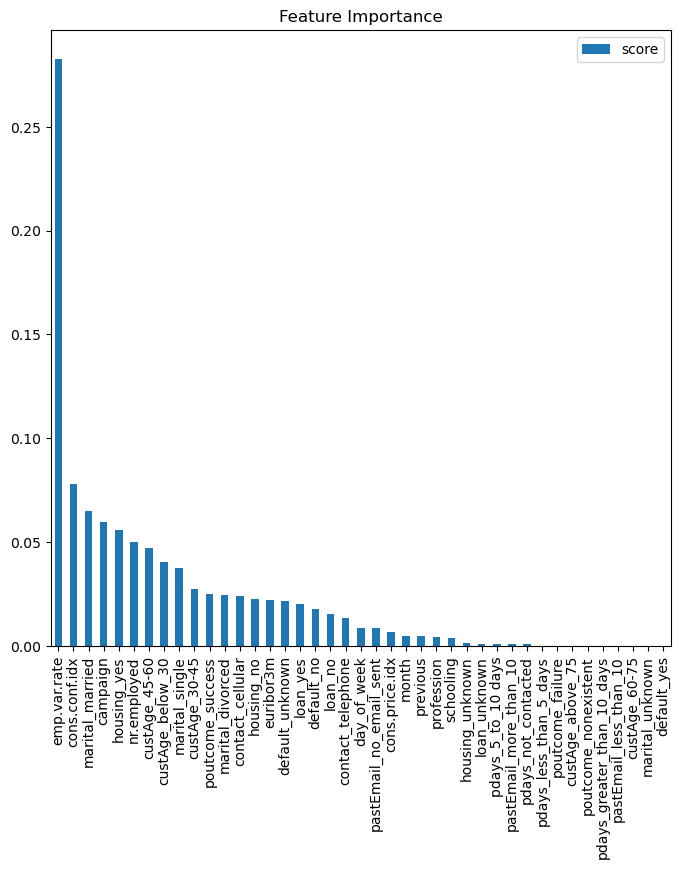

In [164]:
# Get feature importances
feature_importance = best_model.feature_importances_
features = X_test_original.columns
feature_importance_df = pd.DataFrame(data=feature_importance, index=features, columns=["score"]).sort_values(by = "score", ascending=False)
feature_importance_df.plot(kind = 'bar',figsize=(8,8))
plt.title('Feature Importance')

# Save the plot as PNG file
plt.savefig('Feature_importance.png')
plt.show()


In [165]:
# Predict for test data using the best model above
y_predictions = best_model.predict(X_test_original)

# Evaluate the gradient boosting model
accuracy = accuracy_score(y_test_original, y_predictions)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.869


Thus the accuracy > 0.85 is successfully achieved.

In [167]:
# Using F1 Score we are checking the accuracy on the testing dataset
target_names= ["Negative(0)","Positive(1)"]

# Classification Report
report = classification_report(y_test_original,y_predictions,target_names=target_names)
print(report)

              precision    recall  f1-score   support

 Negative(0)       0.93      0.92      0.93      1449
 Positive(1)       0.43      0.49      0.46       186

    accuracy                           0.87      1635
   macro avg       0.68      0.71      0.69      1635
weighted avg       0.88      0.87      0.87      1635



In [168]:
# Checking the accuracy on the testing dataset using confusion matrix
cm = confusion_matrix(y_test_original,y_predictions)

# Extract values from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1328  121]
 [  94   92]]


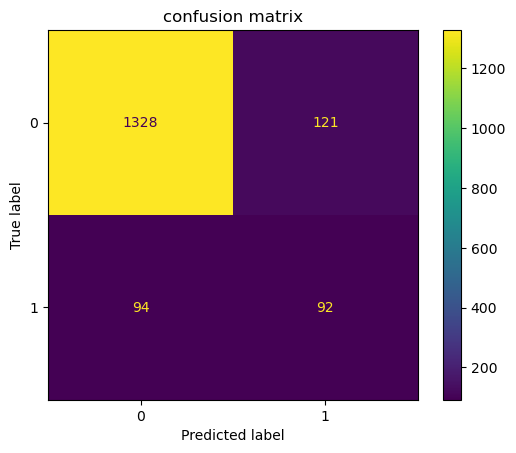

In [169]:
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_model.classes_)
display.plot()

# Save the plot as PNG file
plt.savefig('confusion_matrix.png')
plt.title('confusion matrix')
plt.show()

In [170]:
# Display number of true positives, true negatives, false positives, and false negatives

print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

True Positives: 92
True Negatives: 1328
False Positives: 121
False Negatives: 94


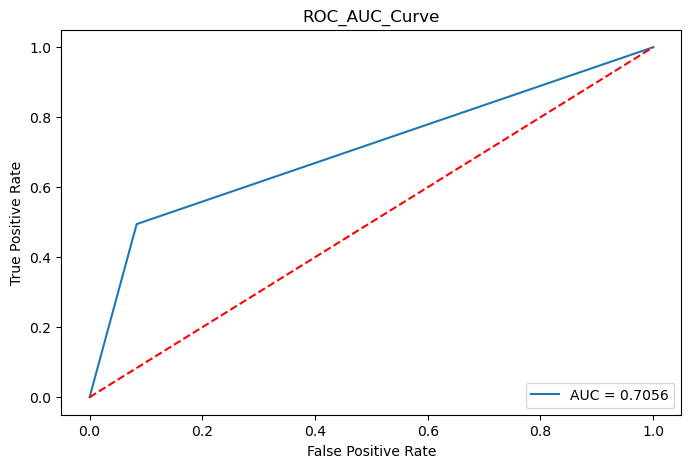

In [171]:
# Plot ROC curve
# Using ROC Curve we are checking the accuracy on the testing dataset
fpr, tpr, thresholds = roc_curve(y_test_original,y_predictions)
auc = round(roc_auc_score(y_test_original,y_predictions),4)
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label=f'AUC = {auc}')

# Add threshold line at 0.50
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Save the plot as PNG file
plt.savefig('ROC_AUC_Curve.png')
plt.title('ROC_AUC_Curve')
plt.show()

### Conclusion:
The accuracy of 0.87(>.85), which is our success metric is achieved with gradient boosting algorithm along with SMOTE technique. 

### Note:
To proceed further for the end-to-end implementation of the project, please refer to the 'Marketing_source_code_pipeline.ipynb' notebook, where the target for the test dataset was identified using the optimal machine learning model.

#### The next step is to apply this model to the test dataset to identify which potential customers should be targeted in the marketing campaign.

Steps: Load and Preprocess the Test Data: We need to ensure that the test data is preprocessed in the same way as the training data. This includes handling missing values, encoding categorical variables, and any other transformations that were applied.

**Make Predictions:** Use the tuned Gradient Boosting Classifier model to predict on the test dataset.

**Generate Output:** We'll create a column in the test dataset with the predictions (1 for 'yes, market to this individual', 0 for 'no, do not market').

**Consider Profit and Cost:** When deciding whether to market to an individual, consider the cost of marketing ($25 per customer) and the expected profit from customers

In [184]:
#Split the features and target
X = new_train_df.drop('responded',axis= 1)
y = new_train_df['responded']

### Train the model

After conducting a thorough analysis in the Python notebook titled 'Machine_learning_model_implementation.ipynb', we determined that the optimal machine learning model for this dataset is 'GradientBoosting + SMOTE'. We are now deploying this model.

In [186]:
# Perform cross-validation with SMOTE technique
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)
smote = SMOTE(random_state=12)
gb_classifier = GradientBoostingClassifier(random_state=12)
pipeline = Pipeline([('smote', smote), ('gb_classifier', gb_classifier)])

# Define the parameter grid to search
parameters = {
    'gb_classifier__n_estimators': [100, 200, 300],
    'gb_classifier__learning_rate': [0.01, 0.1, 0.2],
    'gb_classifier__max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(pipeline, 
                           param_grid = parameters, 
                           cv=skf, 
                           scoring='f1', 
                           n_jobs=-1)
grid_search.fit(X, y)

best_est = grid_search.best_estimator_
best_model = grid_search.best_estimator_['gb_classifier']


### Save the model

In [188]:
import pickle

# Save the model
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [189]:
# Load the model
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

### Predictions on the test dataset

In [191]:
# Make predictions on the test dataset
predictions = loaded_model.predict(new_test_df)

In [192]:
test_predictions = test_df.copy()

### Predictions are added to the test dataset

In [194]:
# Add predictions to the test dataset
test_predictions['responded'] = predictions

In [195]:
test_predictions['responded'].value_counts()

responded
0    23029
1     9921
Name: count, dtype: int64

In [196]:
#Encoding the target 'yes' for 1 and 'no' for 0
test_predictions['responded'] = test_predictions['responded'].replace({0: 'no', 1: 'yes'})

In [197]:
### Save the final test dataset

In [198]:
#Save the updated test dataset
test_predictions.to_excel('test_predictions_file.xlsx', index=False)

### Conclusion:
 Utilizing gradient boosting algorithm along with the SMOTE technique, potential customers for the insurance company have been successfully identified with an accuracy of 0.87. This achievement enables the company to target their potential customers effectively, leading to success in their marketing campaign

### Discussion of future work:

The code for predicting the target variable using the trained model should be separated and deployed on a cloud platform, such as AWS SageMaker. The model can be deployed for real-time predictions or batch processing, depending on business requirements. In this scenario, leads can be grouped, and batch processing via batch-transform would be ideal.

Additionally, the model training code should be integrated into a CI/CD pipeline to enable continuous model improvement and retraining, ensuring that the model evolves as new data becomes available.

### How does this benefit the insurance companies:

Predicting which leads are likely to make a purchase can help the insurance company save both time and money by:

1. **Focusing marketing efforts on high-potential leads** who are more likely to convert, leading to better customer acquisition and driving revenue growth.
2. **Reducing marketing costs** by avoiding investment in leads who are unlikely to make a purchase, as identified by the model.
3. **Saving time and resources** by streamlining efforts toward qualified leads, minimizing wasted effort on leads with low purchase potential.

##### Machine Learning Project by: Jaya sekhani
Thankyou!